In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [2]:
class SVF():
    def __init__(self, cutoffFrequency, sampleRate, resonance):
        self.g  = (math.pi * cutoffFrequency / sampleRate)
        self.R2 = (1.0 / resonance);
        self.h  = (1.0 / (1.0 + self.R2 * self.g + self.g * self.g))
        self.reset()
    
    def reset(self):
        self.s1 = 0
        self.s2 = 0
        
        self.HP = 0
        self.BP = 0
        self.LP = 0
    
    def process(self, sample):
        self.HP = (sample - self.s1 * self.R2 - self.s1 * self.g - self.s2) * self.h
    
        self.BP = self.HP * self.g + self.s1
        self.s1 = self.HP * self.g + self.BP

        self.LP = self.BP * self.g + self.s2
        self.s2 = self.BP * self.g + self.LP
        
        return self.HP, self.BP, self.LP

In [3]:
N = 32768
F_S = 48e3 # Sample Rate in Hz (48 kHz)
F_C = 1500
F_Q = 1.414

# Generate a list of random noise.
noise = [random.random() for a in range(N)]
# Remove any DC offset from the noise - comment out if not required.
noise = np.array(noise) - np.mean(noise)

# Create an instance of the filter with the default settings
f = SVF(F_C, F_S, F_Q)

output = np.empty((N,3))

for index, sample in enumerate(noise):
    hp, bp, lp = f.process(sample)
    output[index][0] = hp
    output[index][1] = bp
    output[index][2] = lp

In [4]:
# Generate X scales for the graphs
time_array = np.linspace(0, 1/F_S * N, N)
freq_array = np.linspace(0, F_S, N)
    
# Take and FFT of the noise and make it real
noise_fft = np.abs(np.fft.fft(noise))

hp_fft = np.abs(np.fft.fft(output[:,0]))
bp_fft = np.abs(np.fft.fft(output[:,1]))
lp_fft = np.abs(np.fft.fft(output[:,2]))

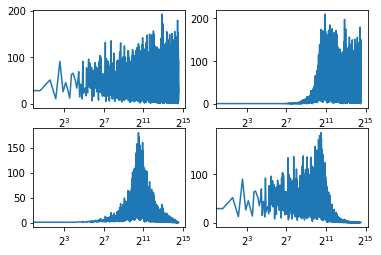

In [5]:
# New figure with a large title
plt.figure(1)

# Plot time domain noise in top left
plt.subplot(2,2,1)
plt.plot(freq_array[:N // 2], noise_fft[:N // 2])
plt.xscale("log", base=2)

# Plot frequency domain noise in bottom left
plt.subplot(2,2,2)
plt.plot(freq_array[:N // 2], hp_fft[:N // 2])
plt.xscale("log", base=2)

# Plot time domain filtered noise in top right
plt.subplot(2,2,3)
plt.plot(freq_array[:N // 2], bp_fft[:N // 2])
plt.xscale("log", base=2)

# Plot frequency domain filtered noise in bottom right
plt.subplot(2,2,4)
plt.plot(freq_array[:N // 2], lp_fft[:N // 2])
plt.xscale("log", base=2)

# Show the plot and wait
plt.show()